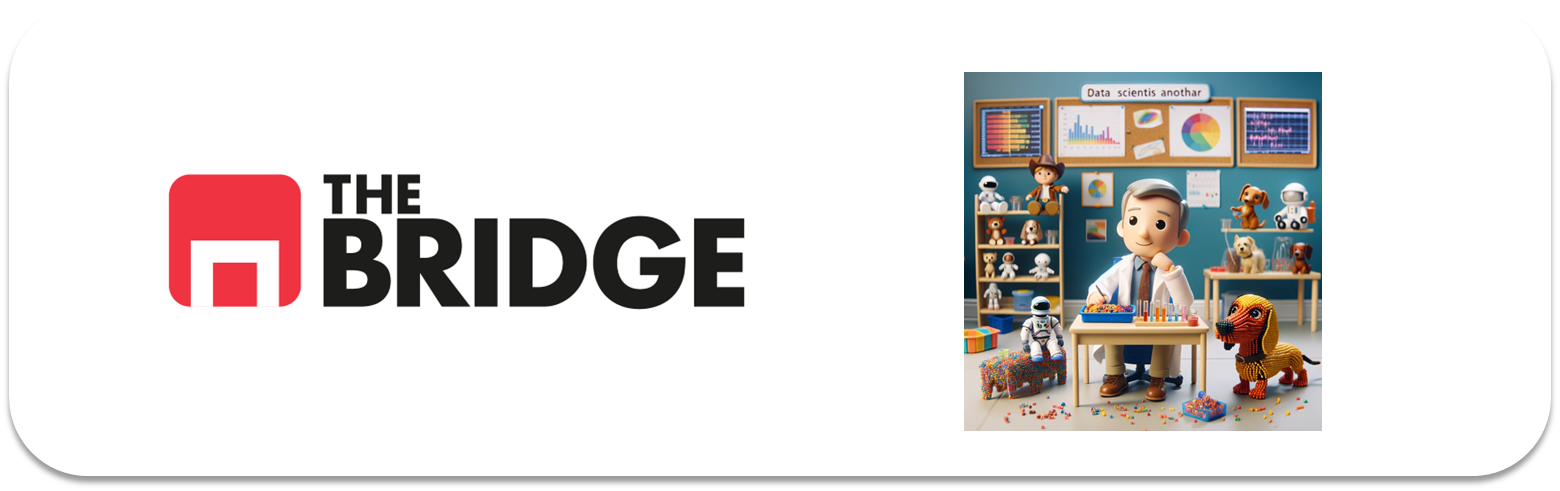

## PRACTICA OBLIGATORIA: **Análisis Univariante**

* La práctica obligatoria de esta unidad consiste en hacer el análisis univariante completo de un dataset con el que acabarás muy familiarizado, el manifiesto de pasajeros del Titanic. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook. Te dejo una que vas a necesitar sí o sí

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns




In [2]:
def pinta_distribucion_categoricas(df, columnas_categoricas, relativa=False, mostrar_valores=False):
    num_columnas = len(columnas_categoricas)
    num_filas = (num_columnas // 2) + (num_columnas % 2)

    fig, axes = plt.subplots(num_filas, 2, figsize=(15, 4 * num_filas))
    axes = axes.flatten() 

    for i, col in enumerate(columnas_categoricas):
        ax = axes[i]
        if relativa:
            total = df[col].value_counts().sum()
            serie = df[col].value_counts().apply(lambda x: x / total)
            sns.barplot(x=serie.index, y=serie, ax=ax, palette='viridis', hue = serie.index, legend = False)
            ax.set_ylabel('Frecuencia Relativa')
        else:
            serie = df[col].value_counts()
            sns.barplot(x=serie.index, y=serie, ax=ax, palette='viridis', hue = serie.index, legend = False)
            ax.set_ylabel('Frecuencia')

        ax.set_title(f'Distribución de {col}')
        ax.set_xlabel('')
        ax.tick_params(axis='x', rotation=45)

        if mostrar_valores:
            for p in ax.patches:
                height = p.get_height()
                ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), 
                            ha='center', va='center', xytext=(0, 9), textcoords='offset points')

    for j in range(i + 1, num_filas * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()


In [3]:
def plot_multiple_boxplots(df, columns, dim_matriz_visual = 2):
    num_cols = len(columns)
    num_rows = num_cols // dim_matriz_visual + num_cols % dim_matriz_visual
    fig, axes = plt.subplots(num_rows, dim_matriz_visual, figsize=(12, 6 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        if df[column].dtype in ['int64', 'float64']:
            sns.boxplot(data=df, x=column, ax=axes[i])
            axes[i].set_title(column)

    # Ocultar ejes vacíos
    for j in range(i+1, num_rows * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()



In [4]:
def plot_combined_graphs(df, columns, whisker_width=1.5):
    num_cols = len(columns)
    if num_cols:
        
        fig, axes = plt.subplots(num_cols, 2, figsize=(12, 5 * num_cols))
        print(axes.shape)

        for i, column in enumerate(columns):
            if df[column].dtype in ['int64', 'float64']:
                # Histograma y KDE
                sns.histplot(df[column], kde=True, ax=axes[i,0] if num_cols > 1 else axes[0])
                if num_cols > 1:
                    axes[i,0].set_title(f'Histograma y KDE de {column}')
                else:
                    axes[0].set_title(f'Histograma y KDE de {column}')

                # Boxplot
                sns.boxplot(x=df[column], ax=axes[i,1] if num_cols > 1 else axes[1], whis=whisker_width)
                if num_cols > 1:
                    axes[i,1].set_title(f'Boxplot de {column}')
                else:
                    axes[1].set_title(f'Boxplot de {column}')

        plt.tight_layout()
        plt.show()

In [5]:
def get_IQR(df, col):
    return df[col].quantile(0.75) - df[col].quantile(0.25)

In [6]:
def variabilidad(df):
    df_var = df.describe().loc[["std","mean"]].T
    df_var["CV"] = df_var["std"]/df_var["mean"]
    return df_var

### #1 Preparación


### #1.1


Carga en un dataframe los datos del titanic a partir de un dataset de seaborn. Para ello:

* ejecuta ```python sns.get_dataset_names()```
* localiza el nombre que puede ser el adecuado para el ejercicio
* Asigna la salida de ```sns.load_dataset(<nombre_del_dataset>)``` a una variable "df_titanic"

In [7]:
df_titanic = sns.load_dataset("titanic")
df_titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


### #1.2

Muestra una porción del dataset ("df_titanic") y su info general. ¿Hay nulos?

In [8]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [9]:
df_titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [47]:
# Nota clase:
df_titanic.loc[df_titanic["who"] == "child", "age"].mean()

np.float64(6.369518072289156)

In [55]:
df_titanic.loc[df_titanic["who"] == "child", ["age","sex"]]

,age,sex
7,2.00,male
9,14.00,female
10,4.00,female
14,14.00,female
16,2.00,male
...,...,...
831,0.83,male
850,4.00,male
852,9.00,female
869,4.00,male


### #1.3

Obtén el porcentaje de nulos y decide que hacer con las columnas con nulos y ejecútalo. Además deshazte de la columna "parch" que no la emplearemos.

In [10]:
df_titanic["age"].isna().value_counts(normalize=True)

age
False    0.801347
True     0.198653
Name: proportion, dtype: float64

In [11]:
df_titanic["age"].mode()

0    24.0
Name: age, dtype: float64

In [12]:
df_titanic = df_titanic.drop(columns=["parch"])

In [13]:
df_titanic

,survived,pclass,sex,age,sibsp,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [14]:
df_titanic["deck"].isna().value_counts(normalize=True)

deck
True     0.772166
False    0.227834
Name: proportion, dtype: float64

In [15]:
df_titanic2 = df_titanic.drop(columns=["deck"]).copy()
df_titanic2

,survived,pclass,sex,age,sibsp,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,NaN,1,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [16]:
mode_age = df_titanic2["age"].mode()[0]
df_titanic2["age"] = df_titanic2["age"].fillna(mode_age)


In [17]:
df_titanic2.isna().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
fare           0
embarked       2
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64

In [18]:
mode_embark_town = df_titanic2["embark_town"].mode()[0]

In [19]:
df_titanic2["embark_town"] = df_titanic2["embark_town"].fillna(mode_embark_town)
df_titanic2.isna().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
fare           0
embarked       2
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [20]:
mode_embarked = df_titanic2["embarked"].mode()[0]
df_titanic2["embarked"] = df_titanic2["embarked"].fillna(mode_embarked)
df_titanic2.isna().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [21]:
df_titanic2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   fare         891 non-null    float64 
 6   embarked     891 non-null    object  
 7   class        891 non-null    category
 8   who          891 non-null    object  
 9   adult_male   891 non-null    bool    
 10  embark_town  891 non-null    object  
 11  alive        891 non-null    object  
 12  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(3), object(5)
memory usage: 72.5+ KB


In [22]:
df_titanic2 = df_titanic2.drop(columns=["pclass"])

In [23]:
df_titanic2 = df_titanic2.drop(columns=["embarked"])

In [24]:
df_titanic2 = df_titanic2.drop(columns=["who"])

In [25]:
pd.crosstab(df_titanic2["sex"], df_titanic2["adult_male"])

adult_male,False,True
sex,,
female,314,0
male,40,537


In [26]:
df_titanic2[["sex", "adult_male"]]. value_counts()

sex     adult_male
male    True          537
female  False         314
male    False          40
Name: count, dtype: int64

In [27]:
df_titanic2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   sex          891 non-null    object  
 2   age          891 non-null    float64 
 3   sibsp        891 non-null    int64   
 4   fare         891 non-null    float64 
 5   class        891 non-null    category
 6   adult_male   891 non-null    bool    
 7   embark_town  891 non-null    object  
 8   alive        891 non-null    object  
 9   alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(2), object(3)
memory usage: 51.6+ KB


In [28]:
df_titanic2.head()

,survived,sex,age,sibsp,fare,class,adult_male,embark_town,alive,alone
0,0,male,22.0,1,7.2500,Third,True,Southampton,no,False
1,1,female,38.0,1,71.2833,First,False,Cherbourg,yes,False
2,1,female,26.0,0,7.9250,Third,False,Southampton,yes,True
3,1,female,35.0,1,53.1000,First,False,Southampton,yes,False
4,0,male,35.0,0,8.0500,Third,True,Southampton,no,True


### #1.4
Sobre el dataset "limpio". Rellena la tabla de descripción (muy breve) de lo que es cada columna en función de su nombre y los valores. Para ayudarte:
* Se trata del dataset que reune lo más parecido a un manifiesto de supervivientes y fallecidos en el viaje.
* sibsp: Es el numero de familiares que viajan con la persona indicada en el manifiesto (lista de pasajeros)
* embarked: Es la incial de la letra de la ciudad donde embarcó la persona.




| Columna/Variable | Descripción |
| ---------------- | ----------- |
| survived       |El número de supervivientes |
|sex   |El sexo de la persona    |
|age   |La edad de la persona    |
|sibsp   |Los acompañantes que iban con la persona    |
|fare   |Cuanto pago por su billete    |
|class   |La clase por la que pago para estar dentro del barco    |
|adult_male   |Muestra si la persona era un hombre adulto(excluyendo niños, etc.)  |
|embark_town   |Lugar donde abordaron el barco   |
|alive   |Si seguía viva la persona   |
|alone   |Si quedaron solos    |



### #1.5

Busca en internet las tres ciudades que visitó el Titanic antes de poner rumbo a su destino y llegar a alta mar. Cambia las iniciales por esos valores.

In [29]:
#Ya esa columna fue eliminada ya que repite la misma informacion que embark_town, la cual ya hace todo esto.
# Southhampton (S)
# Cherbourg (C)
# Queenstown (Q)

### #2 Análisis

Sabiendo que el objetivo de nuestro análisis es hacer un estudio de la superviviencia y mortalidad en el viaje... Haz un análisis univariante completo y ordenado de las siguientes variables:
["survived","who","age","fare","class","embarked","alone"]
Nota: Si quieres añadir más, perfecto.

Separa el análisis en categóricas (incluyendo binarias) y numéricas. Muestra valores, gráficas y conclusiones/observaciones (2 o 3 por variable)

### #2.1 Categóricas

In [30]:
variables_categoricas = [
    "survived",
    "sex",
    "class",
    "adult_male",
    "embark_town",
    "alive",
    "alone"
    ]

#Frecuencia absoluta

for catego in variables_categoricas:
    print(f"Para {catego}")
    print(df_titanic2[catego].value_counts())
    print("\n"*2)

Para survived
survived
0    549
1    342
Name: count, dtype: int64



Para sex
sex
male      577
female    314
Name: count, dtype: int64



Para class
class
Third     491
First     216
Second    184
Name: count, dtype: int64



Para adult_male
adult_male
True     537
False    354
Name: count, dtype: int64



Para embark_town
embark_town
Southampton    646
Cherbourg      168
Queenstown      77
Name: count, dtype: int64



Para alive
alive
no     549
yes    342
Name: count, dtype: int64



Para alone
alone
True     537
False    354
Name: count, dtype: int64





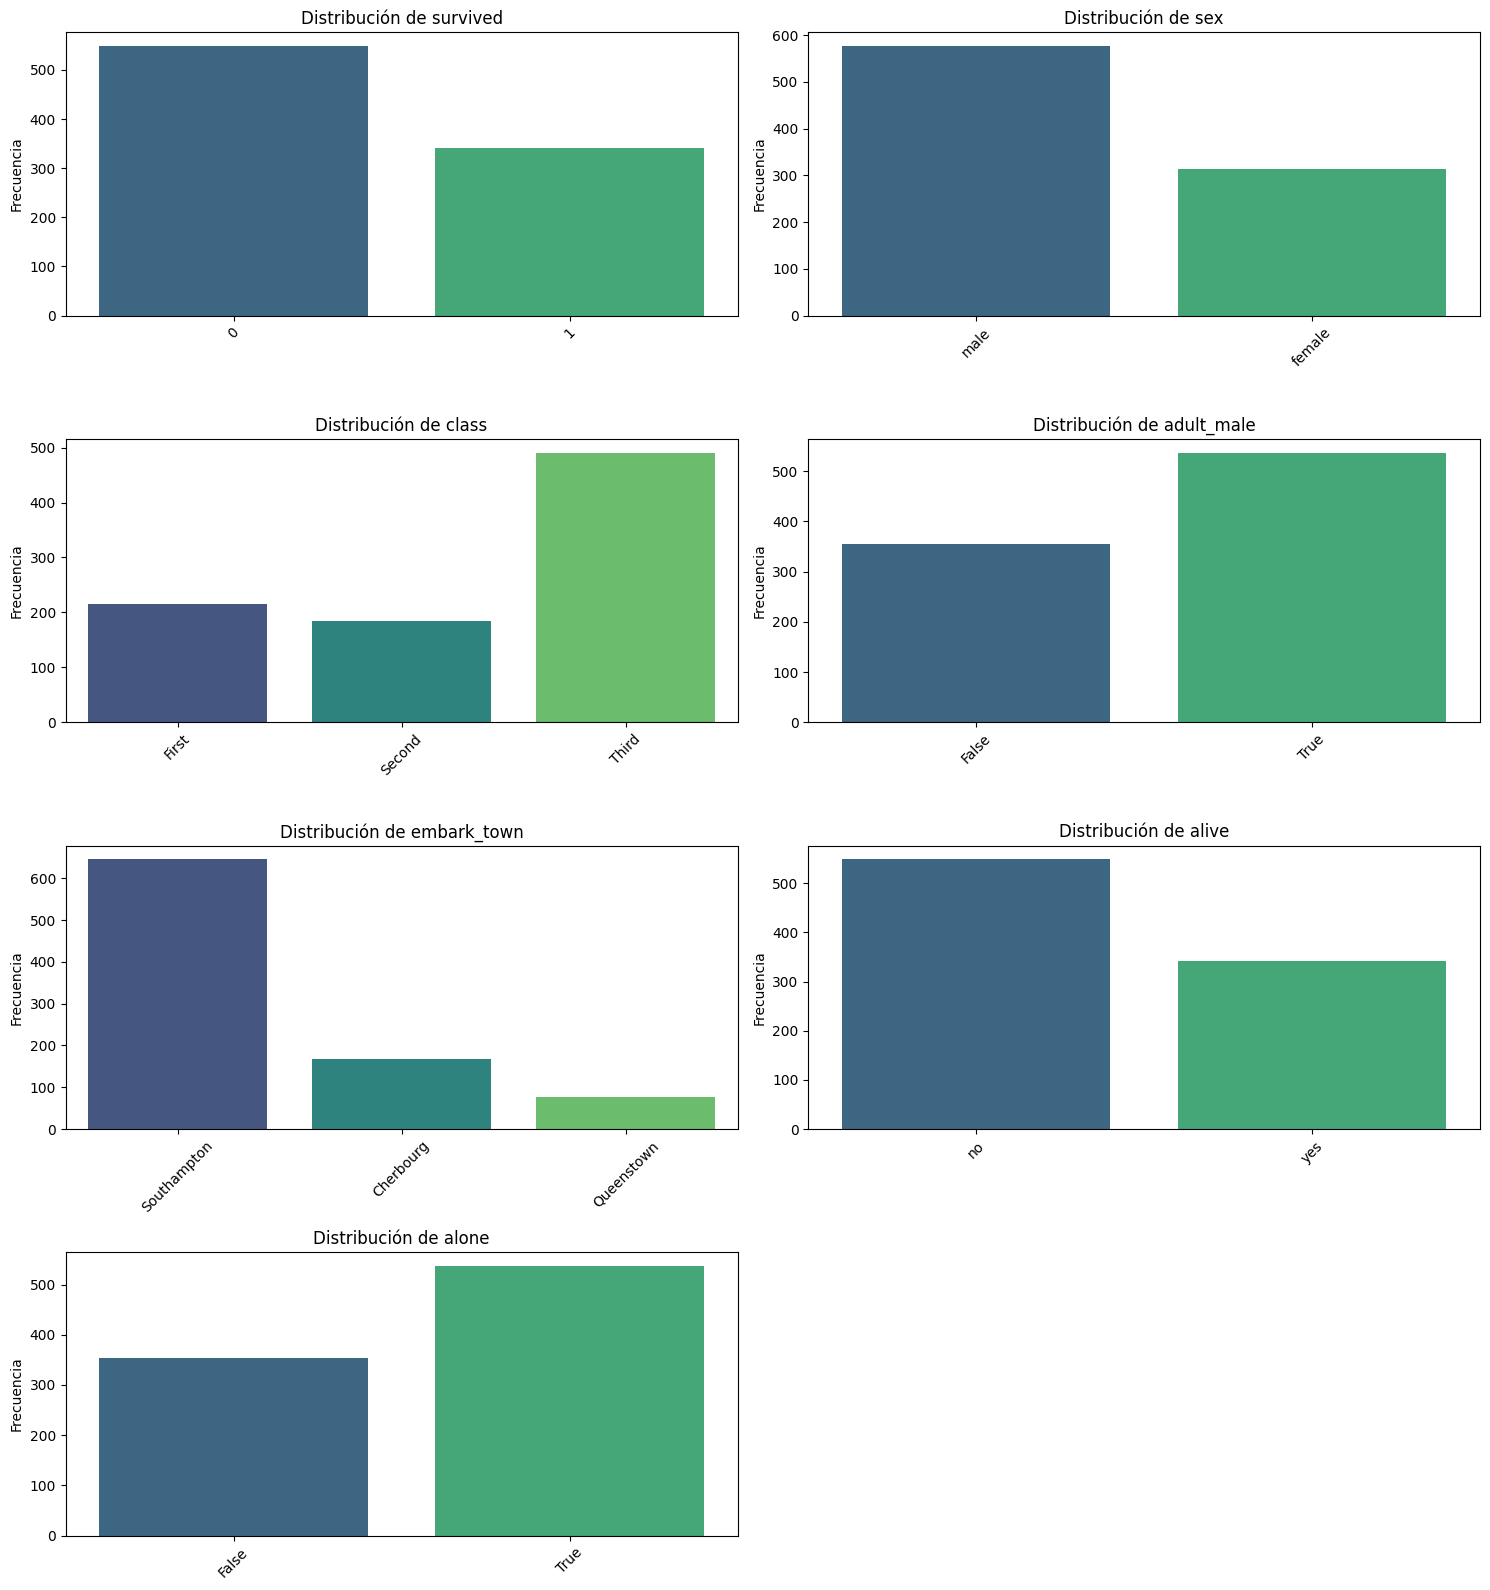

In [31]:
# Frecuencia absoluta en gráfico
pinta_distribucion_categoricas(df_titanic2, variables_categoricas)

In [32]:
# Frecuencia relativa

for catego in variables_categoricas:
    print(f"Para {catego}")
    print(df_titanic2[catego].value_counts()/len(df_titanic2) * 100)
    print("\n"*2)

Para survived
survived
0    61.616162
1    38.383838
Name: count, dtype: float64



Para sex
sex
male      64.758698
female    35.241302
Name: count, dtype: float64



Para class
class
Third     55.106622
First     24.242424
Second    20.650954
Name: count, dtype: float64



Para adult_male
adult_male
True     60.26936
False    39.73064
Name: count, dtype: float64



Para embark_town
embark_town
Southampton    72.502806
Cherbourg      18.855219
Queenstown      8.641975
Name: count, dtype: float64



Para alive
alive
no     61.616162
yes    38.383838
Name: count, dtype: float64



Para alone
alone
True     60.26936
False    39.73064
Name: count, dtype: float64





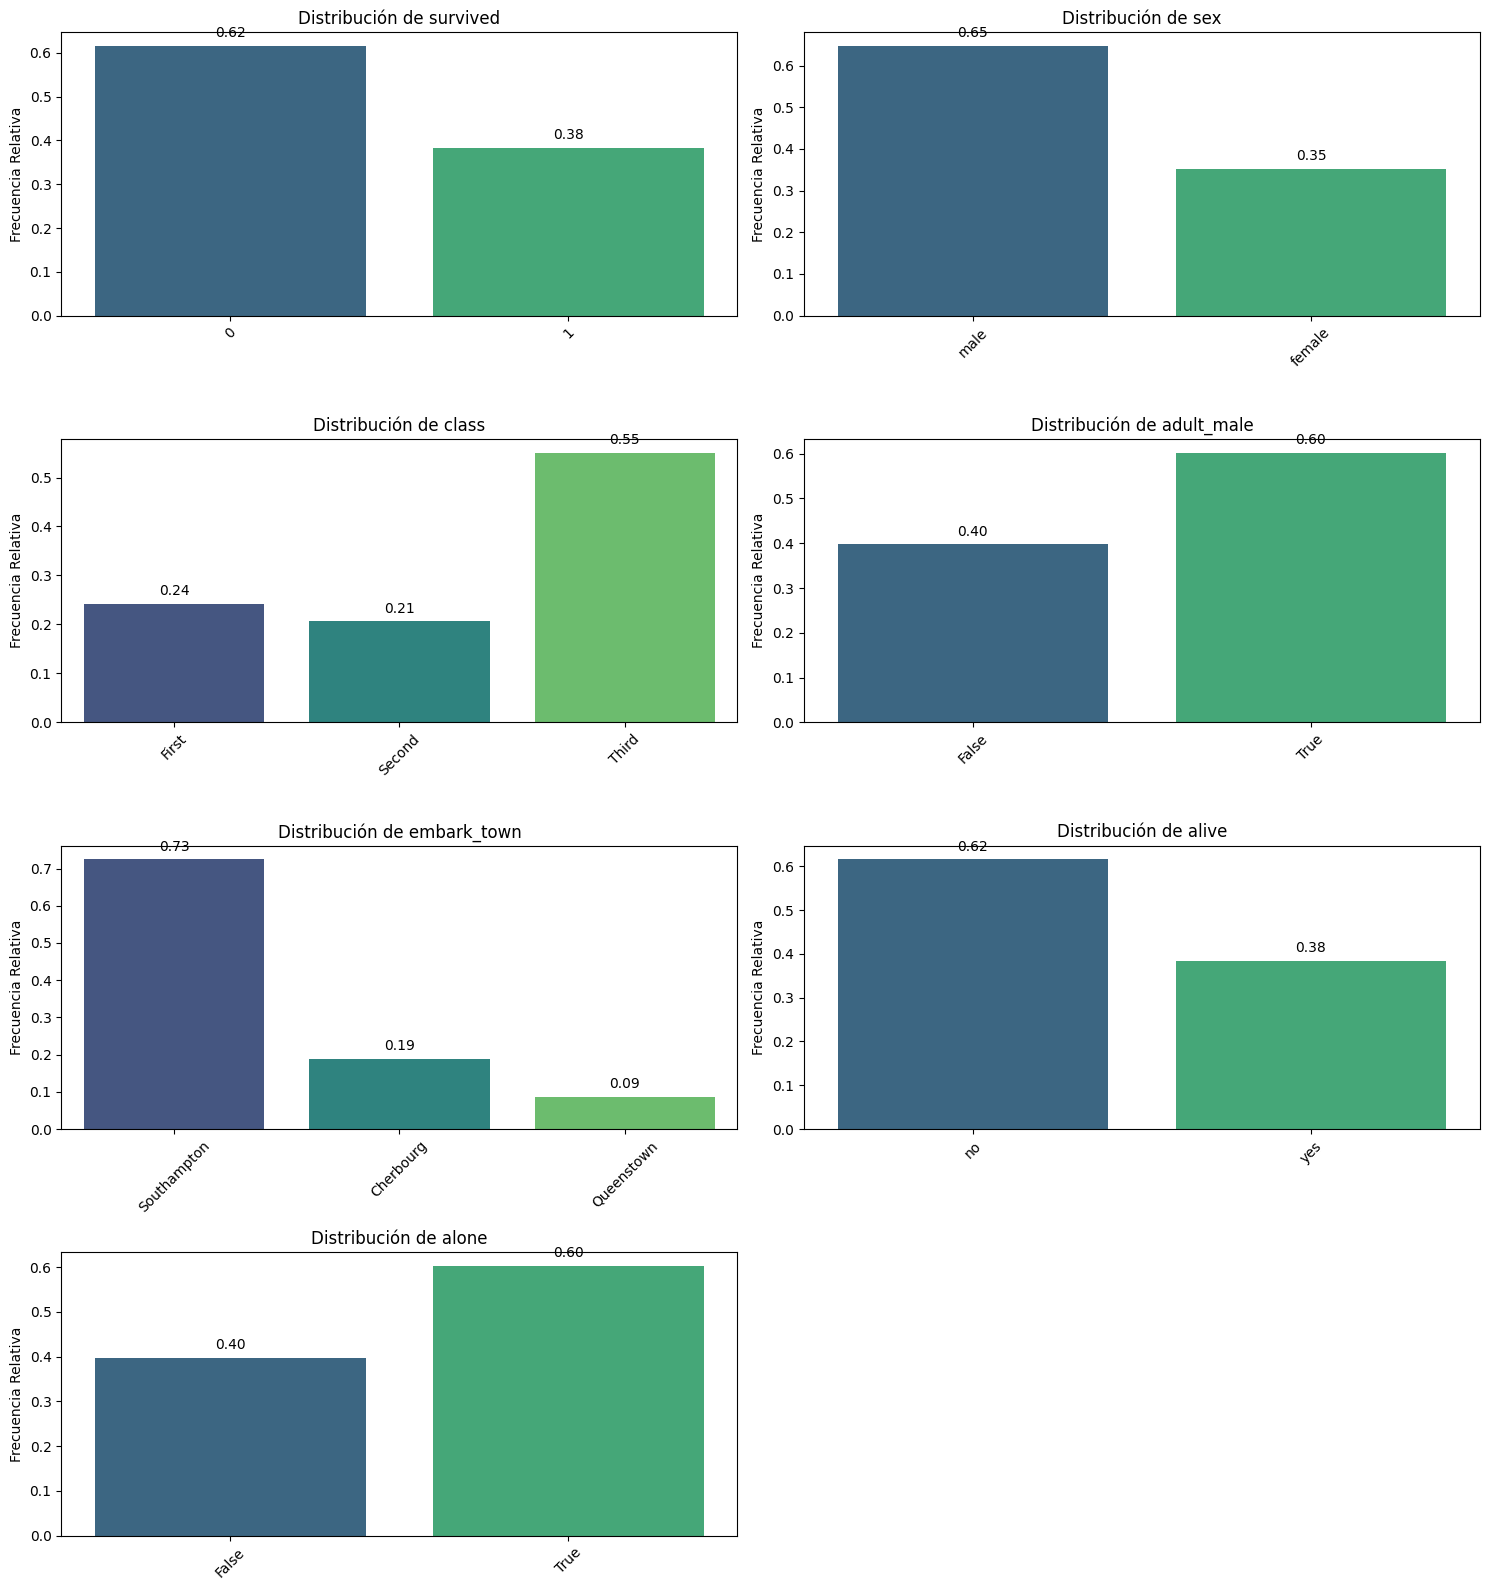

In [33]:
# Frecuencia relativa en gráfico
pinta_distribucion_categoricas(df_titanic2, variables_categoricas, relativa=True, mostrar_valores=True)
# Podemos ver como la gran mayoria (2/3) de los pasajeros a bordo eran hombres con 1/3 siendo mujeres
# Estos numeros coinciden con el numero de supervivientes por sexo (2/3 v. 1/3)
# Más de la mitad de los pasajeros estaban en "Third Class" (puede revelar algo de su clase social)
# Casi 3/4 de los pasajeros emcarcaron en Southhampton
# Cuando se hizo este estudio, etc. solo un poco más de 1/3 de los supervivientes seguían vivos y la mayoría estaban solos(hay que aclarar si solos en el momento del accidente o al hacerse este estudio)

### #2.2 Numéricas

In [34]:
variables_numericas = list(df_titanic2.describe())
variables_numericas

['survived', 'age', 'sibsp', 'fare']

In [35]:
df_titanic2.describe()

,survived,age,sibsp,fare
count,891.000000,891.000000,891.000000,891.000000
mean,0.383838,28.566970,0.523008,32.204208
std,0.486592,13.199572,1.102743,49.693429
min,0.000000,0.420000,0.000000,0.000000
25%,0.000000,22.000000,0.000000,7.910400
50%,0.000000,24.000000,0.000000,14.454200
75%,1.000000,35.000000,1.000000,31.000000
max,1.000000,80.000000,8.000000,512.329200


In [36]:
variabilidad(df_titanic2[variables_numericas])

,std,mean,CV
survived,0.486592,0.383838,1.267701
age,13.199572,28.566970,0.462057
sibsp,1.102743,0.523008,2.108464
fare,49.693429,32.204208,1.543073


(4, 2)


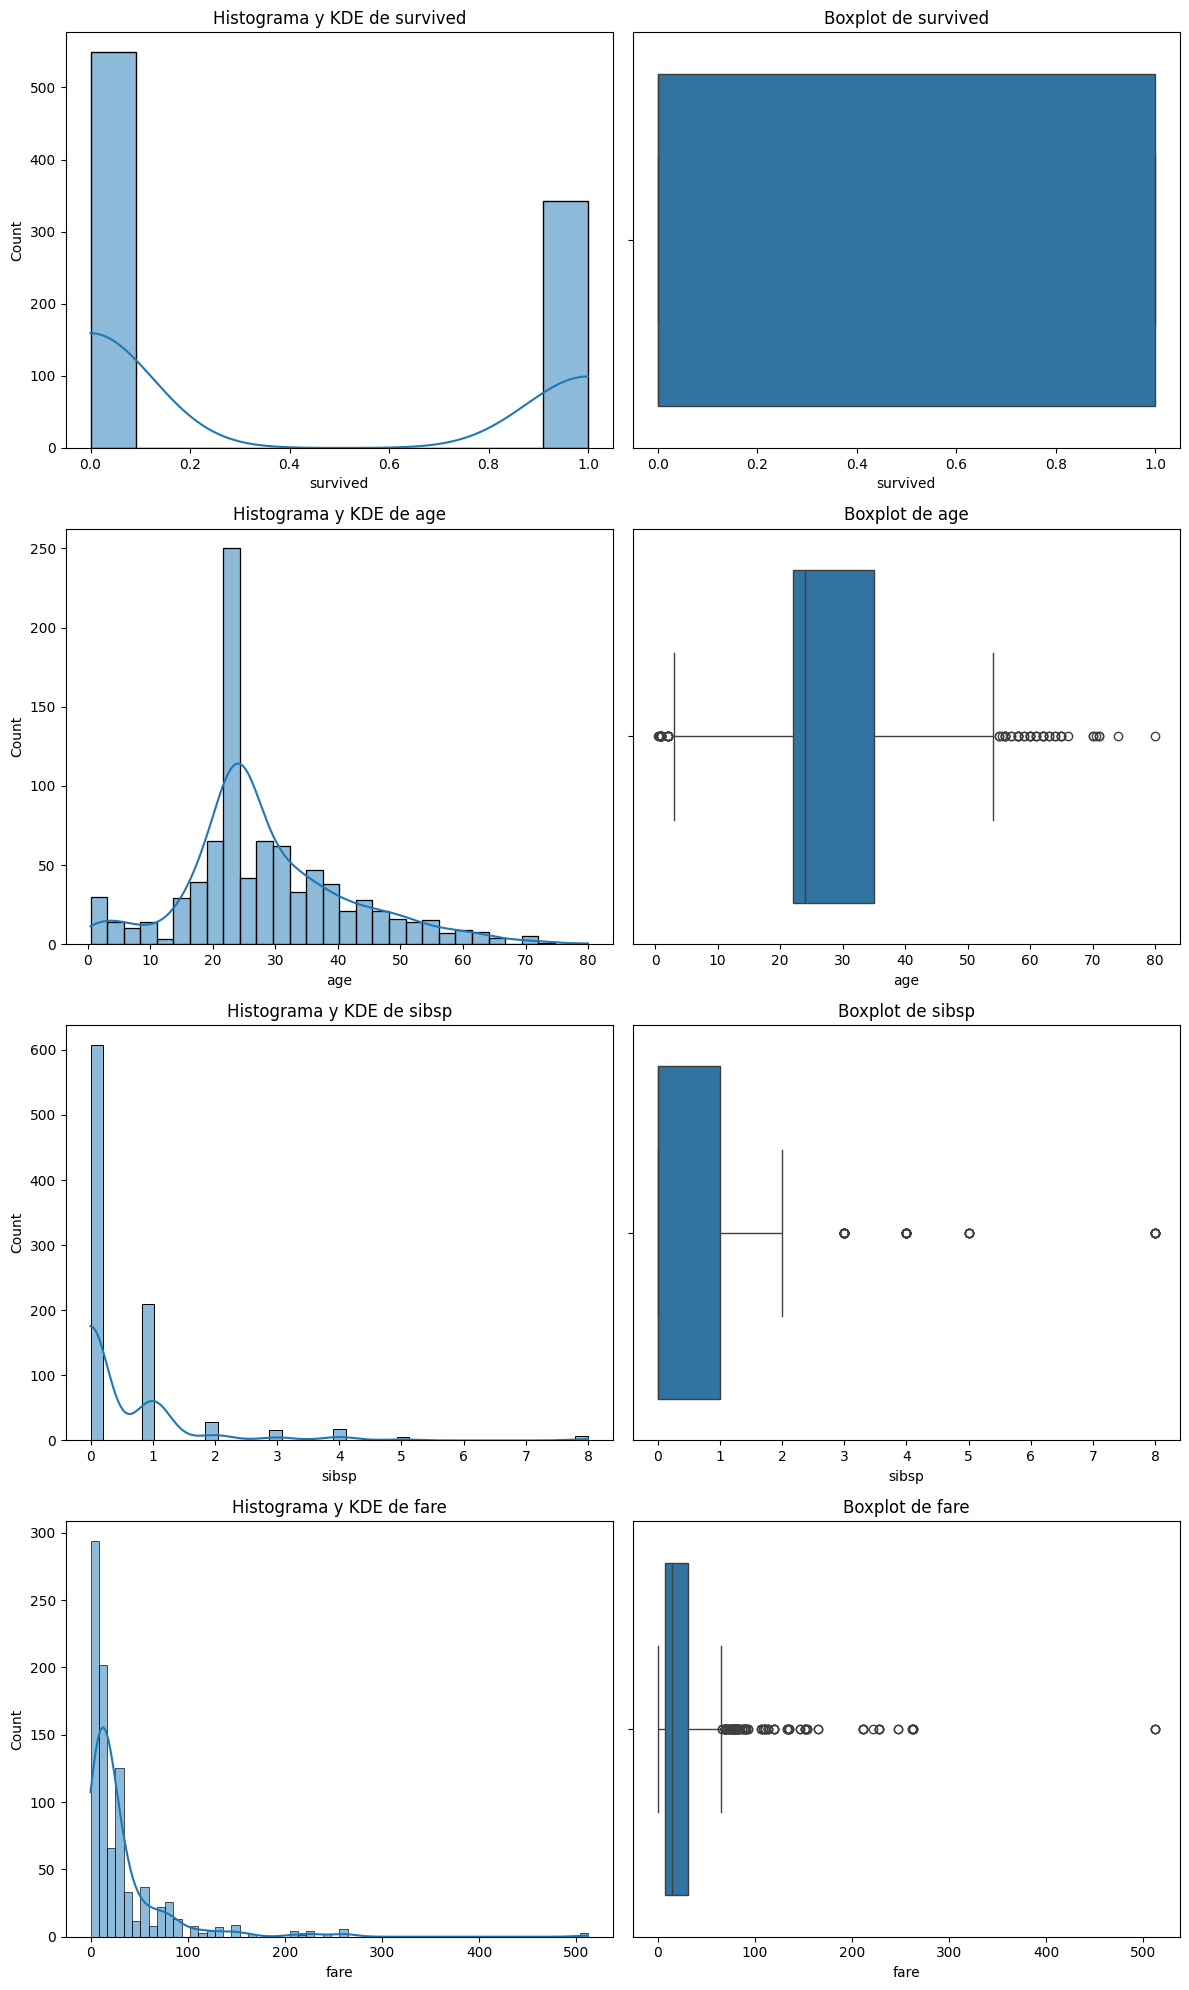

In [37]:
plot_combined_graphs(df_titanic2,variables_numericas)
# Survived es categorica binaria, sineod Yes o No (True o False) las opciones de respuesta
# Alone también
# La media era 24 años y hay una concentracion del 50% de pasajeros entre 25-35 años de edad (la gran mayoría de esa concentracion entre los 24-26 años!!)
# El 50% de los pasajeros estaban solos o con un solo acompañante (la gran mayoría de estos iban solos)

array([[<Axes: title={'center': 'survived'}>,
        <Axes: title={'center': 'age'}>],
       [<Axes: title={'center': 'sibsp'}>,
        <Axes: title={'center': 'fare'}>]], dtype=object)

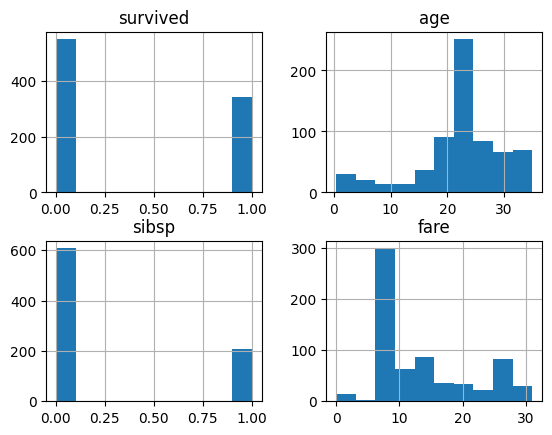

In [38]:
umbral = df_titanic2[variables_numericas].quantile(0.75)
df_sin_outliers = df_titanic2[df_titanic2[variables_numericas] <= umbral]
df_con_outliers = df_titanic2[df_titanic2[variables_numericas] > umbral]

df_sin_outliers.hist()


(4, 2)


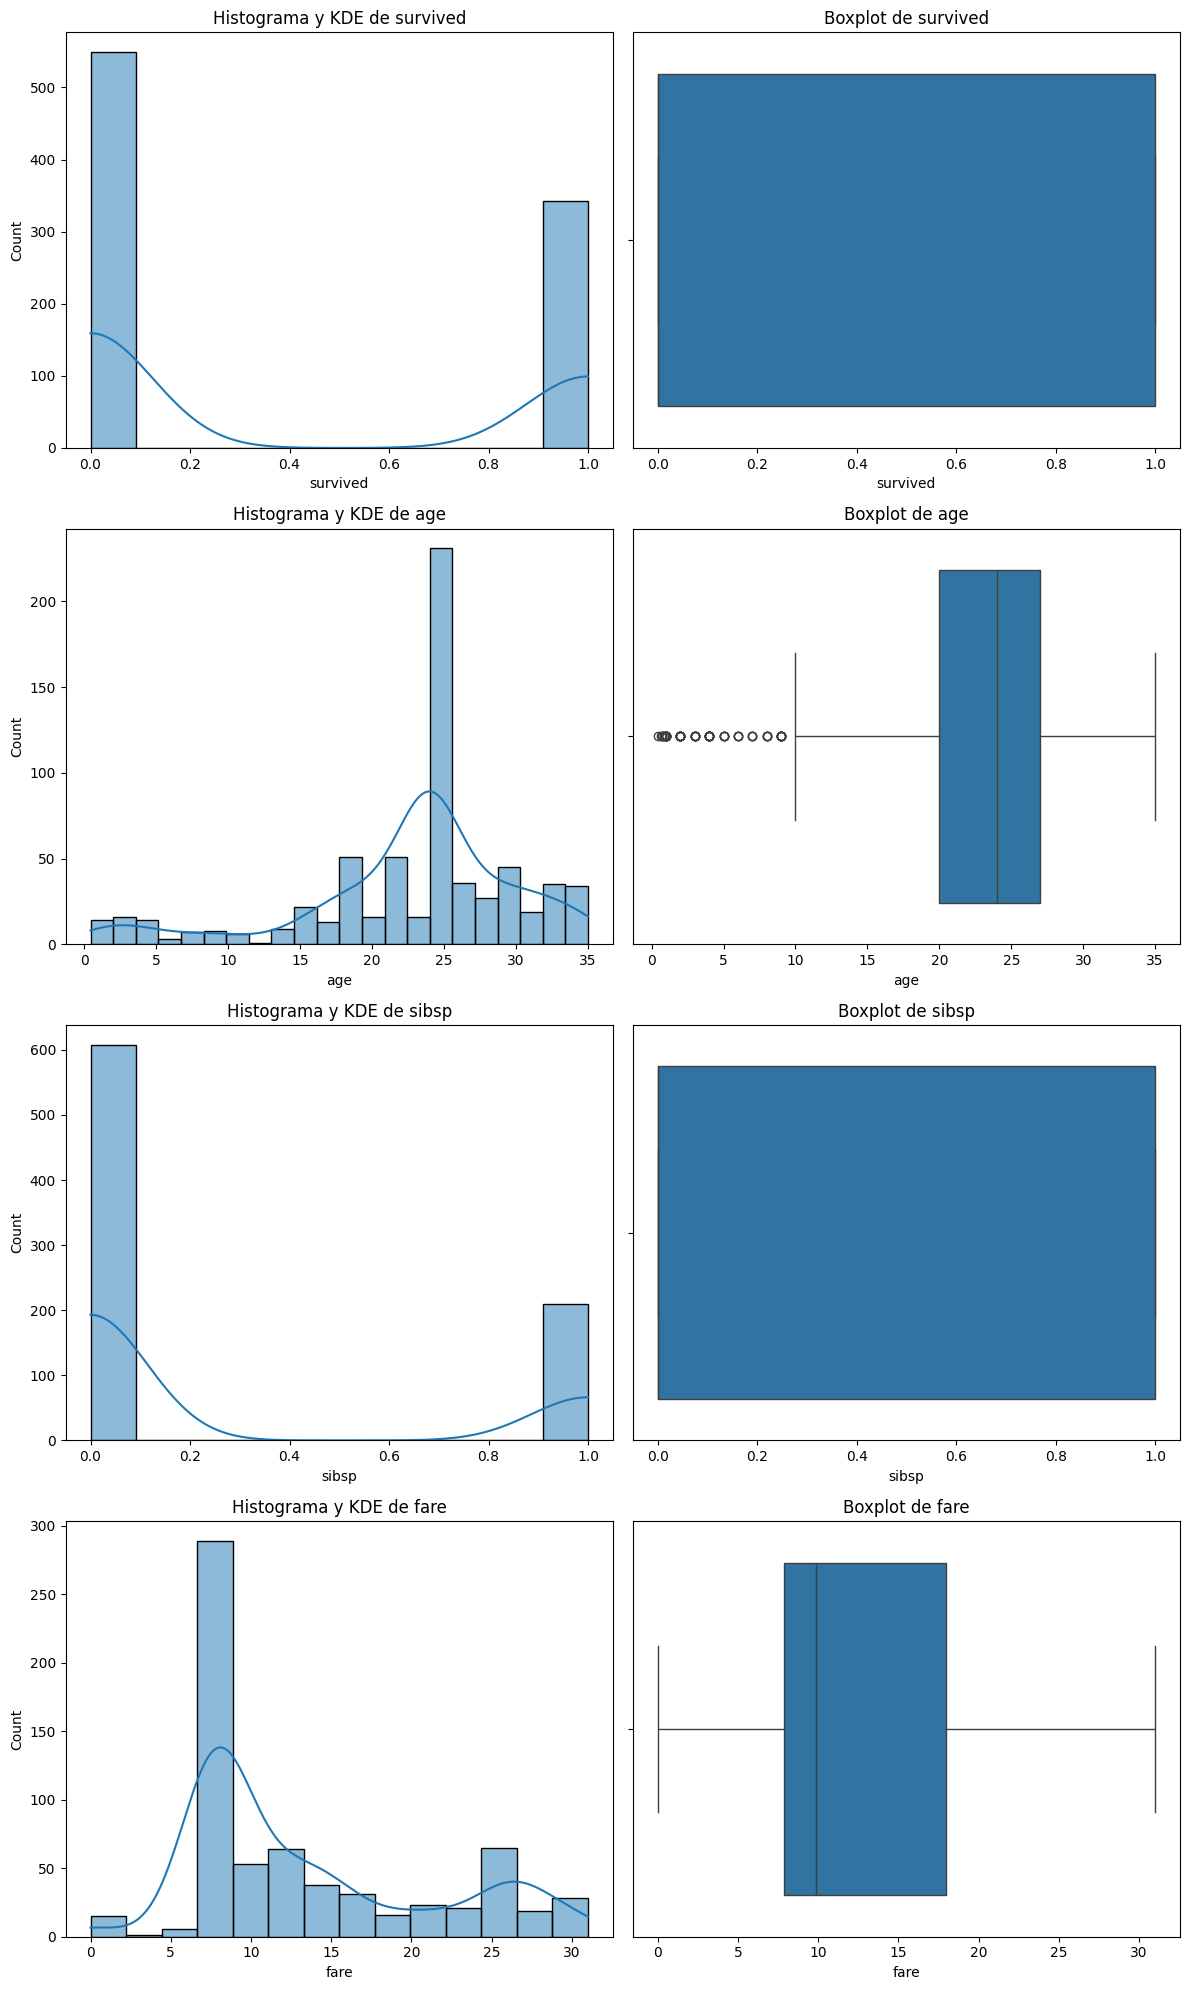

In [39]:
plot_combined_graphs(df_sin_outliers, variables_numericas)